### Priya Gopal : Solutions to Assignment 4B
#### 1. Problem : Extend this to multidimensional integral: Example calculate the volume of a hypersphere of Radius (R=1) and compare it to the values in the file vol.dat. 

The "hit and miss" algorithm can be extended to solving multidimensional integral. When we do a multi-dimensional integral, we are essentially calculating the area under the curve between the limits. 
the Probability of the dart landing inside the enclosed space divided by the total number gives an estimate of the volume enclosed. Let us extend the function to user-defined "d" 
I am using numpy.random.rand() as a a random number generator for generating floats between [0,1]. I am choosing my circle with Radius = 1,

The volumes for the first 9 dimensions are given in vol.dat, Need to read the file and load it to compare with the simulated values.

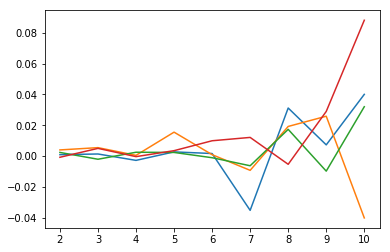

In [97]:
from __future__ import division
from random import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Reading the vol.dat file
f2=open('vol.dat','rw')
lines=f2.readlines()[1:] # this will skip 1 line
dim=[] # first columm
vol=[] #second column
for line in lines:
    p =line.split()
    dim.append(float(p[0]))
    vol.append(float(p[1]))
f2.close
#print (dim)  # Test to see if the data is read properly
#print (vol)

#d=2
#n=1000
# general program to calculate the volume of hypersphere.
#for niter in range(1,10):
#    mcintegrate(3,niter)
##Equation of a hypersphere is given in the handout. you implement that condition    

def mcintegrate(d,N):
    N_inside=0
    my_randoms=[]
    for i in range(1,N):
        my_randoms=np.random.rand(d)
        #print(my_randoms) test to see if the random nos are generated in the list
        if np.sum((my_randoms)**2) <=1:
            N_inside=N_inside+1
           #print(N_inside)
        else:
          #print("Outside the circle") #test for debugging
            fact=float(2**d)
    volume = float(fact*N_inside/N) 
    #print(volume)
    return volume

# Calculate the relative error by comparing for fixed Ntrials = 1000. 
#N=1000
# vary N in a range and plot the error 

N=np.logspace(1.0,5.0,num=4)
for j in range(len(N)):
        mcvol=[]     # Calculated volumes using mcvol for different N values
        volerr=[]   # relative error array for different dimensions
        for i in range(len(dim)):
                mcvol.append(mcintegrate(int(dim[i]),100000))
                #mcvol.append(mcintegrate(int(dim[i]),int(N[j])))
                volerr.append((mcvol[i]-vol[i])/vol[i])
        plt.plot(dim,volerr)

plt.set_title=("Relative error for various N values across dimension")  
plt.set_xlabel=("dimension of hypersphere")
plt.set_ylabel=("Relative error")
plt.show()                 
   

#print(mcintegrate(y,1000))
#print (mcvol) 
#print (volerr)
                  


From the above graph, it is clear that for higher dimensions, you need to increase Ntrials or we could also
try the earlier averaging method. We need to loop over Ntrials multiple times and take the average.
This example here is a very simple approximation to the integration using Monte-Carlo method. We can easily use the MonteCarlo integration method
to calculate the integral of any arbitrary function between a and b $\int_a^b f(x) dx $